<a href="https://colab.research.google.com/github/1o-o1/K-means-Clustering-Distance/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(2)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

blobs4 = datasets.make_blobs(n_samples=n_samples*2,centers=4,random_state=11)

blobs5 = datasets.make_blobs(n_samples=n_samples*6,centers=[[1, 1], [-1, -1], [1, -1],[-1,1],[2,0]],random_state=23,cluster_std=0.3)
no_structure = np.random.rand(n_samples*3, 4), np.zeros(n_samples*3,dtype=int)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

random_state = 47
X, y = blobs5
transformation = [[-0.6, -0.6], [0.4, 1.8]]
X_aniso = np.dot(X, transformation)
aniso2 = (X_aniso, y)


# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples*2, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),

    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "n_clusters": 3,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso2,
        {
            "eps": 0.15,
            "n_neighbors": 5,
            "n_clusters": 5,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (blobs4,
            {
            "min_samples": 7,
             "n_clusters": 4,
            "xi": 0.3,
            "min_cluster_size": 0.3
             }
     ),
         (blobs5,
            {
            "min_samples": 9,
             "n_clusters": 5,
            "xi": 0.1,
            "min_cluster_size": 0.9
             }
     ),
      (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "n_clusters": 3,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (no_structure, {"n_clusters": 4}),
]


<Figure size 1512x936 with 0 Axes>

In [ ]:
names =['circles','moons','Anisotropical left','Anisotropical right','blob Cluster (3)','blob Cluster (4)','blob Cluster (5)', 'Varied Cluster (3)','No Structure']

In [ ]:
colors = np.array(
    list(
        islice(
            cycle(
                [
                            "#e8615d",
                            "#2d9de5","#82b453",
                            "#f49436",
                            
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                ]
            ),
            int(10 + 1),
        )
    )
)
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

circles


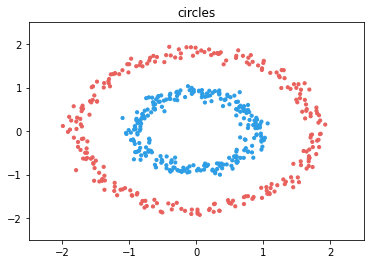

moons


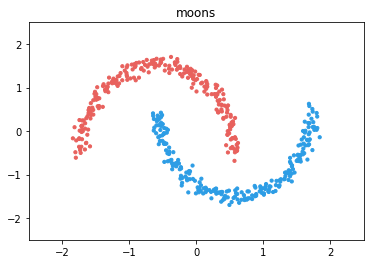

Anisotropical left


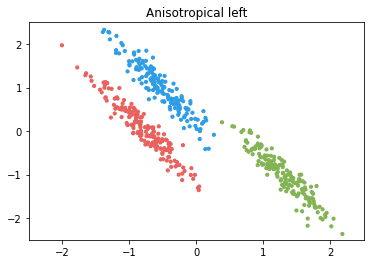

Anisotropical right


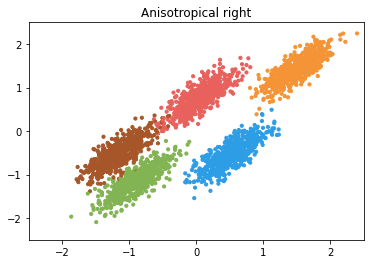

blob Cluster (3)


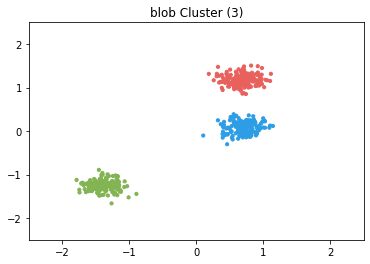

blob Cluster (4)


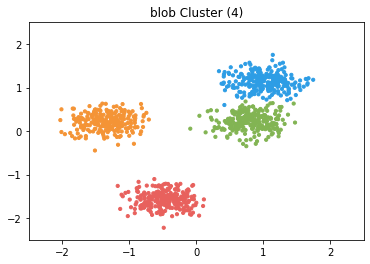

blob Cluster (5)


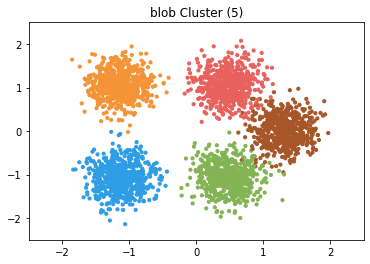

Varied Cluster (3)


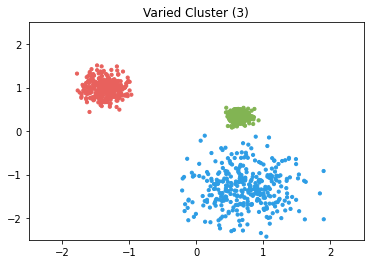

No Structure


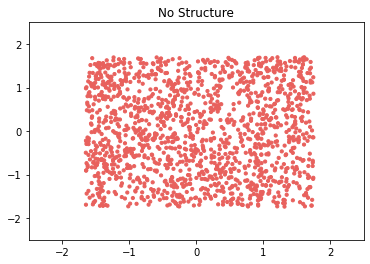

In [ ]:
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    print(names[i_dataset])
    #print(y)
    X = StandardScaler().fit_transform(X)
    ax=plt.scatter(X[:, 0],X[:, 1], s=10,color=colors[y])
    plt.title(names[i_dataset])
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.show()

In [ ]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 8.0 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=a6b7cbb9892b4cbc0eb8c7ed1b8c24973f6fef6d0b322191a93e6acae5a1c47f
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
results_df = pd.DataFrame(columns=['Model', 'DataSet','MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

In [ ]:
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(
        left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
    )

    plot_num = 1
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============

    kmean_elkan = cluster.KMeans(n_clusters=params["n_clusters"],algorithm='elkan')
    kmean_lloyd = cluster.KMeans(n_clusters=params["n_clusters"],algorithm='full')

    #ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    Batch_Kmean = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])



    Kmean_manhat = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )


    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("kmeans Elkan",kmean_elkan),
        ("kmeans Lloyd",kmean_lloyd),
        ("kmeans Manhatten",Kmean_manhat),
        ("MiniBatch\nKMeans", Batch_Kmean),
        ("Affinity\nPropagation", affinity_propagation),
        ("Spectral\nClustering", spectral),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        #plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        #if i_dataset == 0:
        #    plt.title(name, size=18)
        print("Algorithm :" +name+" Dataset "+names[i_dataset])
        print('----------------------------')
        print('Test set evaluation:\n_____________________________________')
        print_evaluate(y, y_pred)
        results_df_2 = pd.DataFrame(data=[[name,names[i_dataset], *evaluate(y, y_pred)]], 
                            columns=['Model', 'DataSet','MAE', 'MSE', 'RMSE', 'R2 Square'])
        results_df = results_df.append(results_df_2, ignore_index=True)
        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#e8615d",
                            "#2d9de5",
                            "#f49436",
                            "#82b453",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.figure(figsize=(7, 7))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1
        plt.show()

plt.show()

In [ ]:
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

circles
--------------


Algorithm :euclidean Dataset circles
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.822
MSE: 1.142
RMSE: 1.0686440005914037
R2 Square -3.5679999999999996
__________________________________


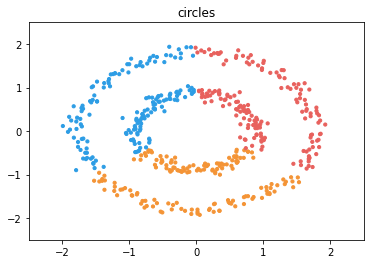

Algorithm :squared euclidean Dataset circles
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.82
MSE: 1.14
RMSE: 1.0677078252031311
R2 Square -3.5599999999999996
__________________________________


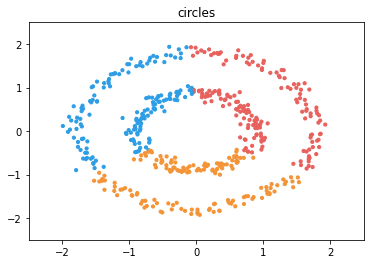

Algorithm :manhattan Dataset circles
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.84
MSE: 1.188
RMSE: 1.089954127475097
R2 Square -3.752
__________________________________


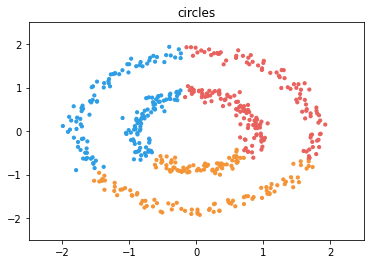

Algorithm :chebyshev Dataset circles
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.862
MSE: 1.186
RMSE: 1.0890362712049586
R2 Square -3.7439999999999998
__________________________________


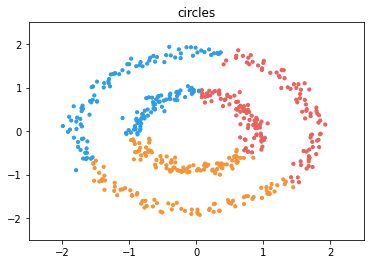

Algorithm :canberra Dataset circles
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.814
MSE: 1.166
RMSE: 1.079814798935447
R2 Square -3.6639999999999997
__________________________________


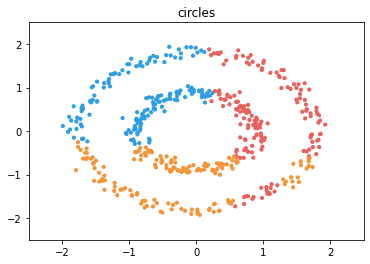

Algorithm :chi-square Dataset circles
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.866
MSE: 1.23
RMSE: 1.1090536506409416
R2 Square -3.92
__________________________________


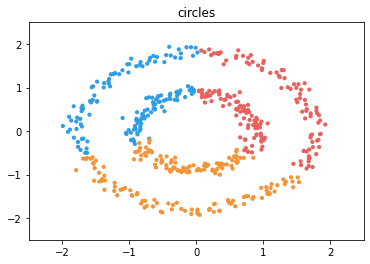

moons
--------------


Algorithm :euclidean Dataset moons
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.488
MSE: 0.824
RMSE: 0.9077444574328174
R2 Square -2.296
__________________________________


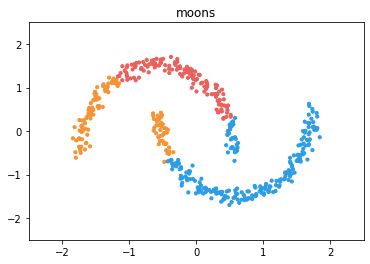

Algorithm :squared euclidean Dataset moons
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.462
MSE: 0.77
RMSE: 0.8774964387392122
R2 Square -2.08
__________________________________


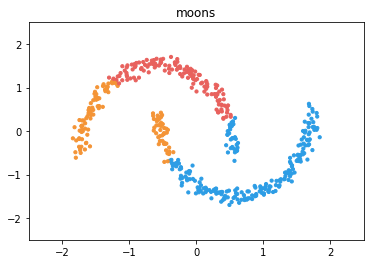

Algorithm :manhattan Dataset moons
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.488
MSE: 0.824
RMSE: 0.9077444574328174
R2 Square -2.296
__________________________________


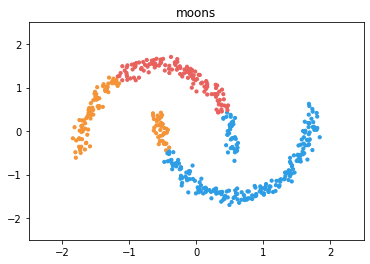

Algorithm :chebyshev Dataset moons
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.448
MSE: 0.688
RMSE: 0.8294576541331088
R2 Square -1.7519999999999998
__________________________________


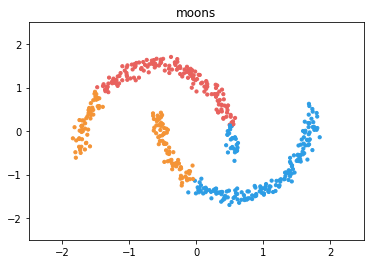

Algorithm :canberra Dataset moons
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.314
MSE: 0.394
RMSE: 0.6276941930590086
R2 Square -0.5760000000000001
__________________________________


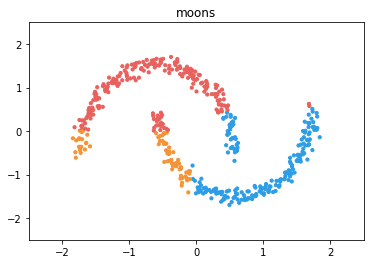

Algorithm :chi-square Dataset moons
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.356
MSE: 0.48
RMSE: 0.6928203230275509
R2 Square -0.9199999999999999
__________________________________


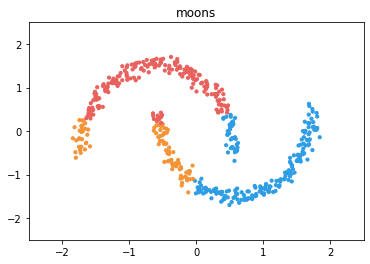

Anisotropical left
--------------


Algorithm :euclidean Dataset Anisotropical left
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.33
MSE: 2.158
RMSE: 1.4690132742763082
R2 Square -2.240259701259468
__________________________________


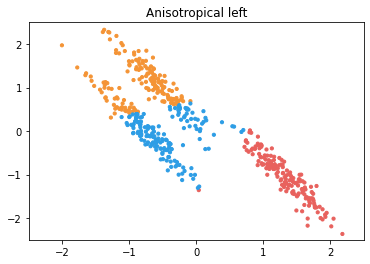

Algorithm :squared euclidean Dataset Anisotropical left
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.354
MSE: 2.21
RMSE: 1.4866068747318506
R2 Square -2.318338248277768
__________________________________


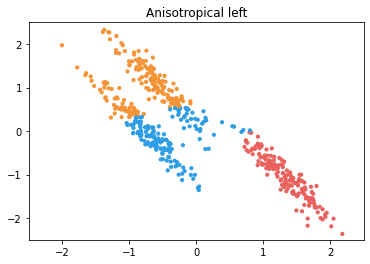

Algorithm :manhattan Dataset Anisotropical left
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.282
MSE: 2.122
RMSE: 1.4567086187704115
R2 Square -2.1862053225544904
__________________________________


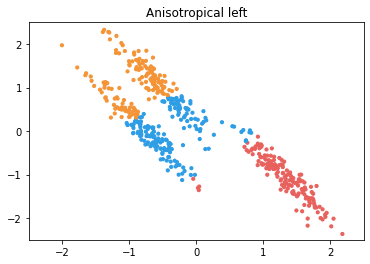

Algorithm :chebyshev Dataset Anisotropical left
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.348
MSE: 2.16
RMSE: 1.469693845669907
R2 Square -2.243262722298633
__________________________________


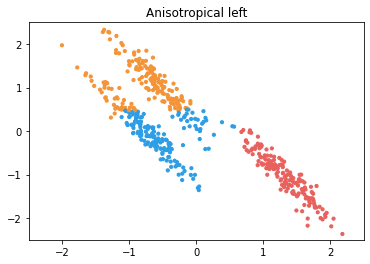

Algorithm :canberra Dataset Anisotropical left
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.478
MSE: 2.474
RMSE: 1.5728954192825408
R2 Square -2.714737025447601
__________________________________


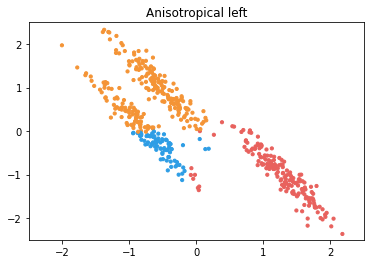

Algorithm :chi-square Dataset Anisotropical left
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.424
MSE: 2.348
RMSE: 1.5323185047502363
R2 Square -2.5255466999801808
__________________________________


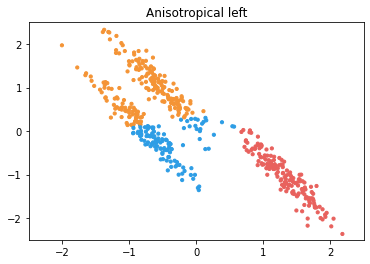

Anisotropical right
--------------


Algorithm :euclidean Dataset Anisotropical right
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.941
MSE: 4.671666666666667
RMSE: 2.1614038647755462
R2 Square -1.3358333333333334
__________________________________


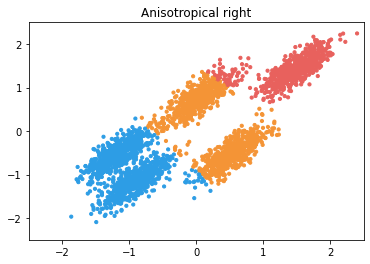

Algorithm :squared euclidean Dataset Anisotropical right
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.932
MSE: 4.652666666666667
RMSE: 2.1570040951900546
R2 Square -1.3263333333333334
__________________________________


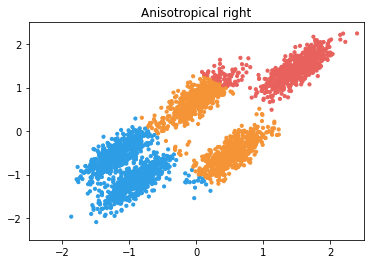

Algorithm :manhattan Dataset Anisotropical right
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.2286666666666666
MSE: 2.5113333333333334
RMSE: 1.584718692176417
R2 Square -0.2556666666666667
__________________________________


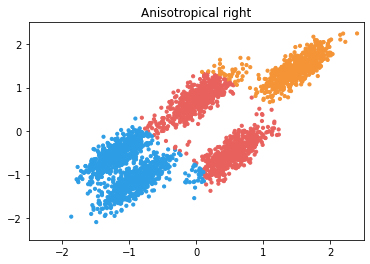

Algorithm :chebyshev Dataset Anisotropical right
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.934
MSE: 4.6593333333333335
RMSE: 2.1585488952843606
R2 Square -1.3296666666666668
__________________________________


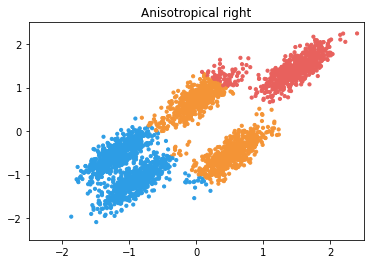

Algorithm :canberra Dataset Anisotropical right
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.603
MSE: 4.003
RMSE: 2.0007498594277098
R2 Square -1.0015
__________________________________


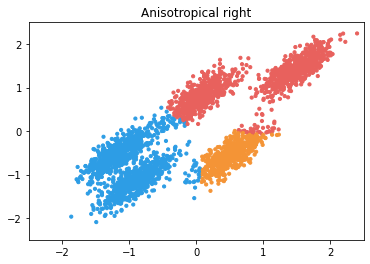

Algorithm :chi-square Dataset Anisotropical right
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.618
MSE: 4.028666666666667
RMSE: 2.007153872194822
R2 Square -1.0143333333333335
__________________________________


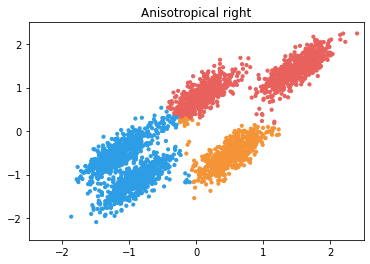

blob Cluster (3)
--------------


Algorithm :euclidean Dataset blob Cluster (3)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.332
MSE: 1.996
RMSE: 1.4127986409959488
R2 Square -1.9970149970870703
__________________________________


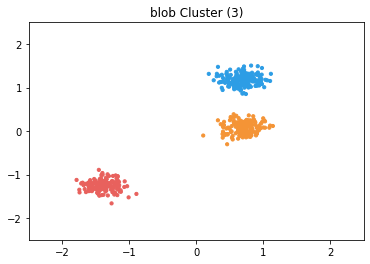

Algorithm :squared euclidean Dataset blob Cluster (3)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.332
MSE: 1.996
RMSE: 1.4127986409959488
R2 Square -1.9970149970870703
__________________________________


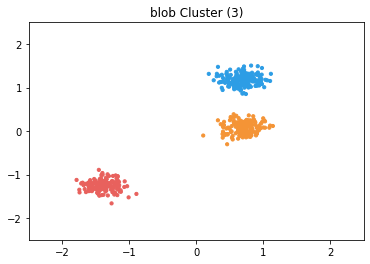

Algorithm :manhattan Dataset blob Cluster (3)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.332
MSE: 1.996
RMSE: 1.4127986409959488
R2 Square -1.9970149970870703
__________________________________


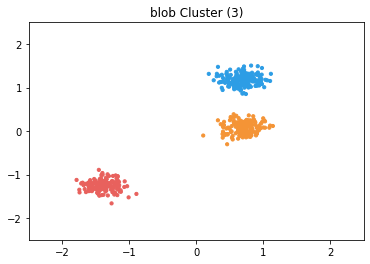

Algorithm :chebyshev Dataset blob Cluster (3)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.332
MSE: 1.996
RMSE: 1.4127986409959488
R2 Square -1.9970149970870703
__________________________________


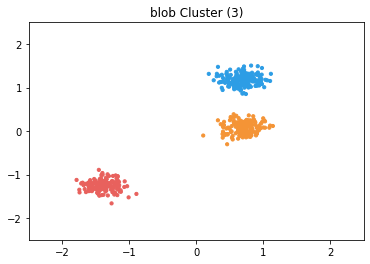

Algorithm :canberra Dataset blob Cluster (3)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.112
MSE: 1.776
RMSE: 1.3326664999166145
R2 Square -1.6666826827788759
__________________________________


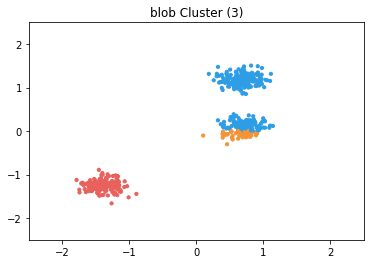

Algorithm :chi-square Dataset blob Cluster (3)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.332
MSE: 1.996
RMSE: 1.4127986409959488
R2 Square -1.9970149970870703
__________________________________


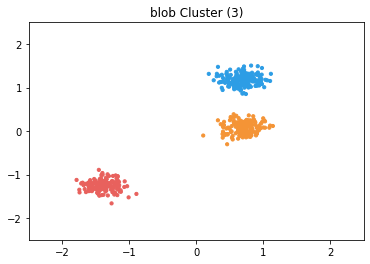

blob Cluster (4)
--------------


Algorithm :euclidean Dataset blob Cluster (4)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.25
MSE: 1.75
RMSE: 1.3228756555322954
R2 Square -0.3999999999999999
__________________________________


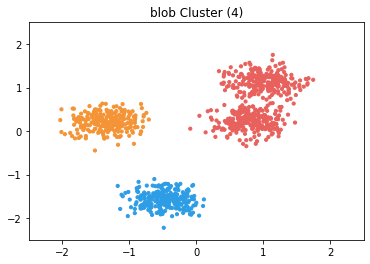

Algorithm :squared euclidean Dataset blob Cluster (4)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.25
MSE: 1.75
RMSE: 1.3228756555322954
R2 Square -0.3999999999999999
__________________________________


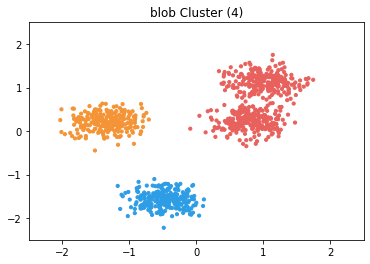

Algorithm :manhattan Dataset blob Cluster (4)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.248
MSE: 1.746
RMSE: 1.3213629327327143
R2 Square -0.39680000000000004
__________________________________


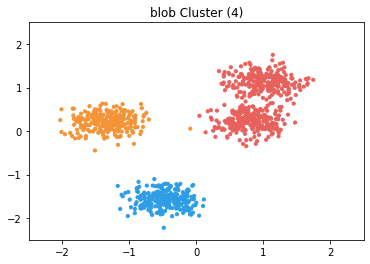

Algorithm :chebyshev Dataset blob Cluster (4)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.25
MSE: 1.75
RMSE: 1.3228756555322954
R2 Square -0.3999999999999999
__________________________________


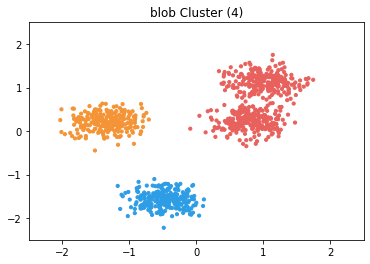

Algorithm :canberra Dataset blob Cluster (4)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.25
MSE: 1.752
RMSE: 1.3236313686219439
R2 Square -0.40159999999999996
__________________________________


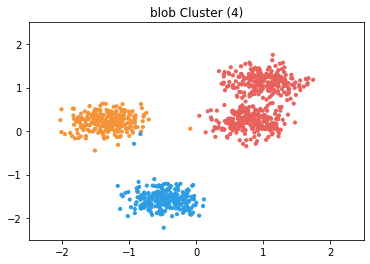

Algorithm :chi-square Dataset blob Cluster (4)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.248
MSE: 1.746
RMSE: 1.3213629327327143
R2 Square -0.39680000000000004
__________________________________


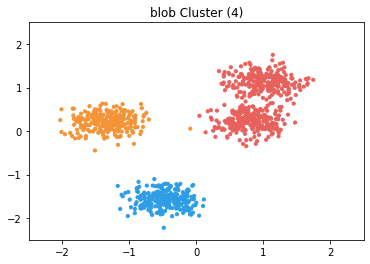

blob Cluster (5)
--------------


Algorithm :euclidean Dataset blob Cluster (5)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.6053333333333333
MSE: 4.003333333333333
RMSE: 2.0008331597945226
R2 Square -1.0016666666666665
__________________________________


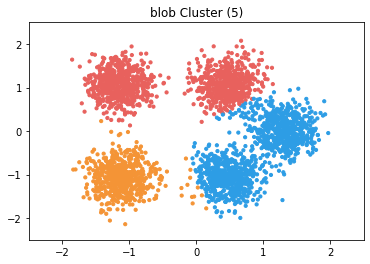

Algorithm :squared euclidean Dataset blob Cluster (5)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.6053333333333333
MSE: 4.003333333333333
RMSE: 2.0008331597945226
R2 Square -1.0016666666666665
__________________________________


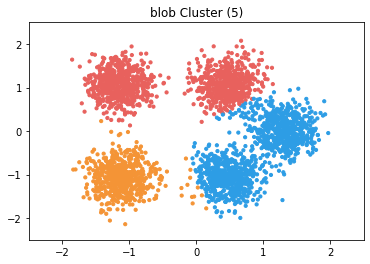

Algorithm :manhattan Dataset blob Cluster (5)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.5693333333333332
MSE: 3.9553333333333334
RMSE: 1.9888019844452423
R2 Square -0.9776666666666667
__________________________________


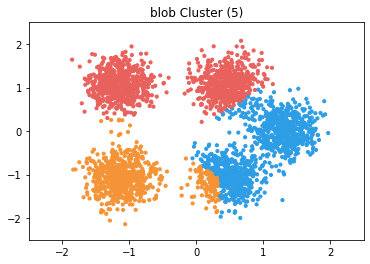

Algorithm :chebyshev Dataset blob Cluster (5)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.606
MSE: 4.008
RMSE: 2.001999000998752
R2 Square -1.004
__________________________________


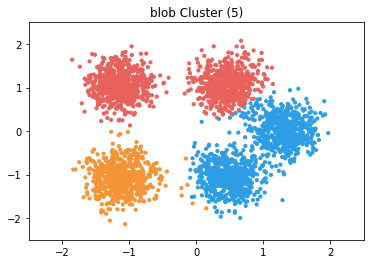

Algorithm :canberra Dataset blob Cluster (5)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.739
MSE: 3.796333333333333
RMSE: 1.9484181618259806
R2 Square -0.8981666666666666
__________________________________


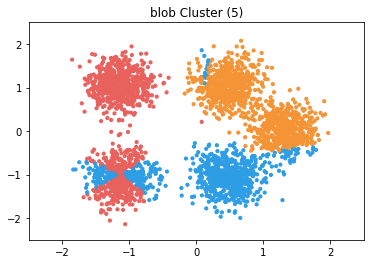

Algorithm :chi-square Dataset blob Cluster (5)
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.606
MSE: 4.006
RMSE: 2.00149943792148
R2 Square -1.0030000000000001
__________________________________


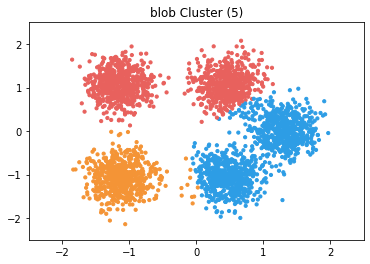

Varied Cluster (3)
--------------


Algorithm :euclidean Dataset Varied Cluster (3)
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.65
MSE: 0.65
RMSE: 0.806225774829855
R2 Square 0.025485795331027572
__________________________________


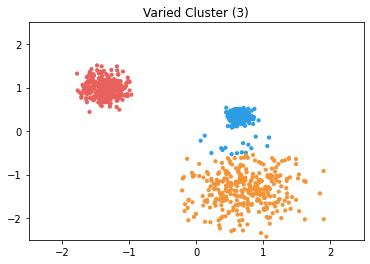

Algorithm :squared euclidean Dataset Varied Cluster (3)
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.65
MSE: 0.65
RMSE: 0.806225774829855
R2 Square 0.025485795331027572
__________________________________


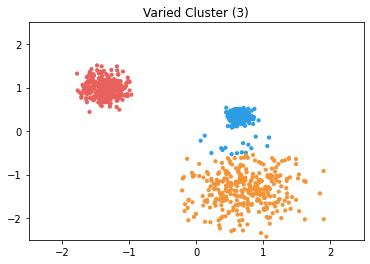

Algorithm :manhattan Dataset Varied Cluster (3)
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.651
MSE: 0.651
RMSE: 0.8068457101577724
R2 Square 0.0239865427084599
__________________________________


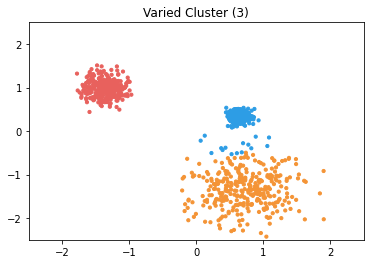

Algorithm :chebyshev Dataset Varied Cluster (3)
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.651
MSE: 0.651
RMSE: 0.8068457101577724
R2 Square 0.0239865427084599
__________________________________


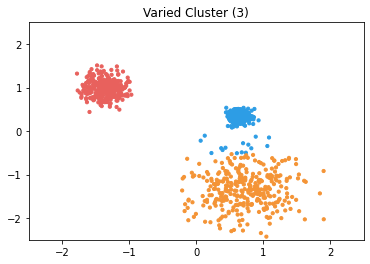

Algorithm :canberra Dataset Varied Cluster (3)
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.666
MSE: 0.666
RMSE: 0.8160882305241266
R2 Square 0.0014977533699450651
__________________________________


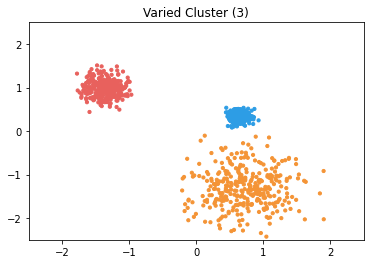

Algorithm :chi-square Dataset Varied Cluster (3)
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.661
MSE: 0.661
RMSE: 0.8130190649671138
R2 Square 0.008994016482783418
__________________________________


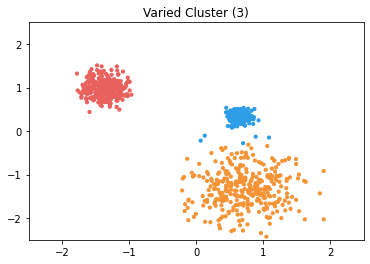

No Structure
--------------


Algorithm :euclidean Dataset No Structure
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.1113333333333333
MSE: 1.8993333333333333
RMSE: 1.3781630285758406
R2 Square 0.0
__________________________________


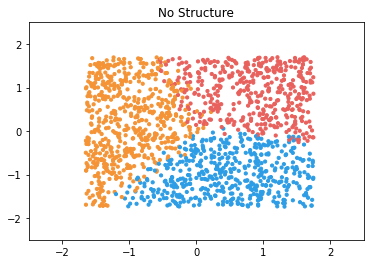

Algorithm :squared euclidean Dataset No Structure
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.1133333333333333
MSE: 1.9066666666666667
RMSE: 1.3808210118138653
R2 Square 0.0
__________________________________


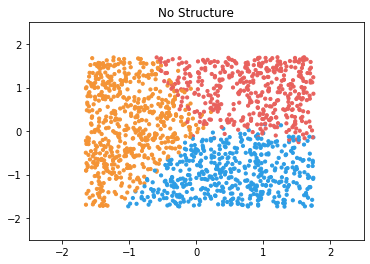

Algorithm :manhattan Dataset No Structure
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.094
MSE: 1.8753333333333333
RMSE: 1.3694281044776806
R2 Square 0.0
__________________________________


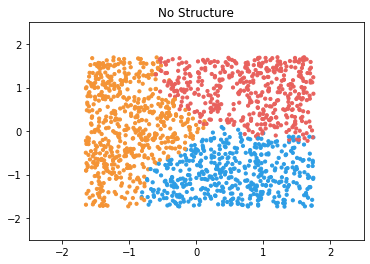

Algorithm :chebyshev Dataset No Structure
----------------------------
Test set evaluation:
_____________________________________
MAE: 0.9186666666666666
MSE: 1.5266666666666666
RMSE: 1.2355835328567093
R2 Square 0.0
__________________________________


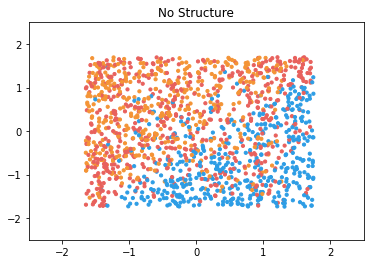

Algorithm :canberra Dataset No Structure
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.004
MSE: 1.6773333333333333
RMSE: 1.2951190421476064
R2 Square 0.0
__________________________________


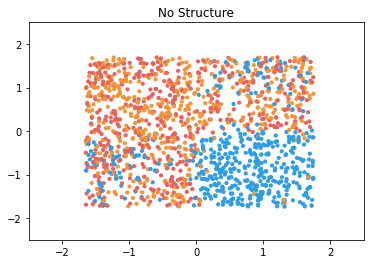

Algorithm :chi-square Dataset No Structure
----------------------------
Test set evaluation:
_____________________________________
MAE: 1.0333333333333334
MSE: 1.7946666666666666
RMSE: 1.3396516960264957
R2 Square 0.0
__________________________________


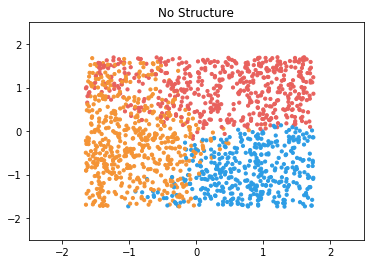

In [ ]:
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    print(names[i_dataset])
    print("--------------\n\n")
    X = StandardScaler().fit_transform(X)
    initial_centers = random_center_initializer(X, 3, random_state=5).initialize()

    for measure, value in distance_measures.items():
      
      # instance created for respective distance metric
      instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(value))
      # perform cluster analysis
      instanceKm.process()
      # cluster analysis results - clusters and centers
      pyClusters = instanceKm.get_clusters()
      pyCenters = instanceKm.get_centers()
      # enumerate encoding type to index labeling to get labels
      pyEncoding = instanceKm.get_cluster_encoding()
      pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
      pyLabels = pyEncoder.set_encoding(0).get_clusters()
      
      model_name = "Algorithm :" +measure+" Dataset "+names[i_dataset]
      print(model_name)
      print('----------------------------')
      print('Test set evaluation:\n_____________________________________')
      print_evaluate(y, pyLabels)
      results_df_2 = pd.DataFrame(data=[[measure,names[i_dataset], *evaluate(y, pyLabels)]], 
                          columns=['Model','DataSet', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
      results_df = results_df.append(results_df_2, ignore_index=True)
      ax=plt.scatter(X[:, 0],X[:, 1], s=10,color=colors[pyLabels])
      plt.title(names[i_dataset])
      plt.xlim(-2.5, 2.5)
      plt.ylim(-2.5, 2.5)
      plt.show()


In [ ]:
results_df

,Model,DataSet,MAE,MSE,RMSE,R2 Square,Cross Validation
0,kmeans Elkan,circles,0.496000,0.496000,0.704273,-0.984,NaN
1,kmeans Lloyd,circles,0.500000,0.500000,0.707107,-1.000,NaN
2,kmeans Manhatten,circles,0.484000,0.484000,0.695701,-0.936,NaN
3,MiniBatch\nKMeans,circles,0.500000,0.500000,0.707107,-1.000,NaN
4,Affinity\nPropagation,circles,249.000000,82837.996000,287.815906,-331350.984,NaN
...,...,...,...,...,...,...,...
148,squared euclidean,No Structure,1.113333,1.906667,1.380821,0.000,NaN
149,manhattan,No Structure,1.094000,1.875333,1.369428,0.000,NaN
150,chebyshev,No Structure,0.918667,1.526667,1.235584,0.000,NaN
151,canberra,No Structure,1.004000,1.677333,1.295119,0.000,NaN


In [ ]:
pd.DataFrame.from_dict(results_df).to_csv('ClusteringEvol.csv',index=False)